## Constraint Satisfaction Problem

### Map Coloring Problem
![MAP](map.jpg)

Color assignments for the regions:
WA: red
NT: green
Q: red
NSW: green
V: red
SA: blue
T: red


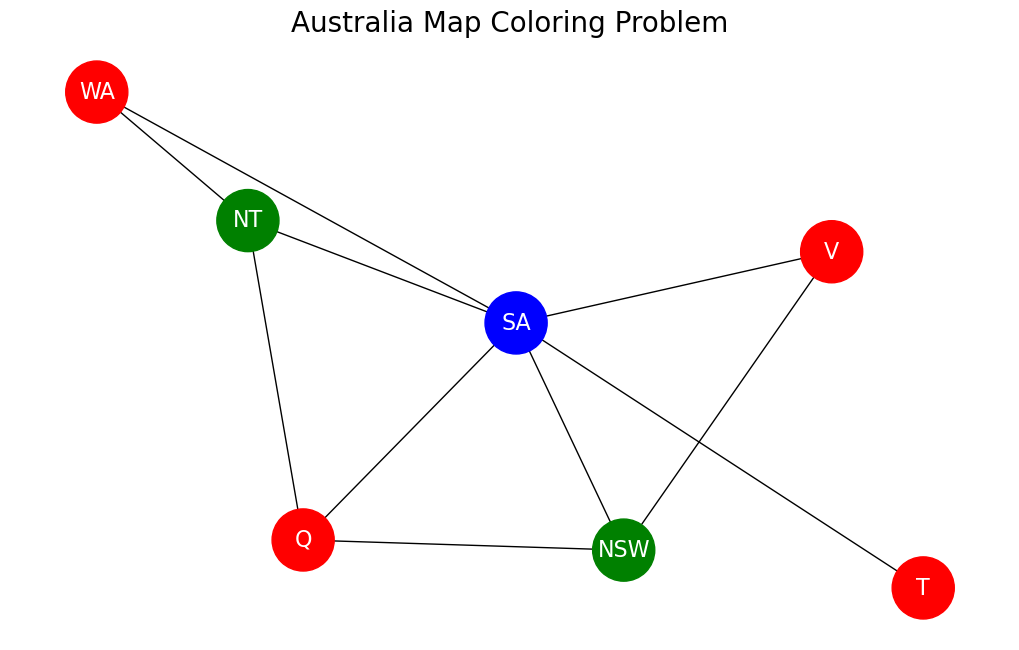

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the regions and their adjacency
regions = {
    'WA': ['NT', 'SA'],
    'NT': ['WA', 'Q', 'SA'],
    'Q': ['NT', 'NSW', 'SA'],
    'NSW': ['Q', 'SA', 'V'],
    'V': ['SA', 'NSW'],
    'SA': ['WA', 'NT', 'Q', 'NSW', 'V'],
    'T': ['SA']
}

colors = ['red', 'green', 'blue']  # Possible colors
assignment = {}  # To store the color assignments

def is_valid_assignment(region, color):
    """Check if the color assignment is valid."""
    for neighbor in regions[region]:
        if neighbor in assignment and assignment[neighbor] == color:
            return False
    return True

def select_unassigned_region():
    """Select the first unassigned region."""
    for region in regions:
        if region not in assignment:
            return region
    return None

def backtrack():
    """Recursive backtracking algorithm to solve the map coloring problem."""
    # If all regions are assigned, we have a solution
    if len(assignment) == len(regions):
        return assignment

    # Select an unassigned region
    unassigned_region = select_unassigned_region()

    for color in colors:
        if is_valid_assignment(unassigned_region, color):
            # Assign color to the region
            assignment[unassigned_region] = color
            
            # Recursively try to assign colors to the rest
            result = backtrack()
            if result:
                return result  # Solution found
            
            # Backtrack: remove the color assignment
            del assignment[unassigned_region]

    return None  # No valid assignment found

def visualize():
    """Visualize the coloring solution using a graph."""
    # Create a graph
    G = nx.Graph()

    # Add nodes and edges based on regions and adjacency
    for region in regions:
        G.add_node(region)
        for neighbor in regions[region]:
            G.add_edge(region, neighbor)

    # Set colors for nodes based on the assignment
    color_map = []
    for region in G.nodes:
        color_map.append(assignment.get(region, 'lightgrey'))  # Default color for unassigned regions

    # Draw the graph
    plt.figure(figsize=(10, 6))
    nx.draw(G, with_labels=True, node_color=color_map, node_size=2000, font_size=16, font_color='white')
    plt.title("Australia Map Coloring Problem", fontsize=20)
    plt.show()

# Solve the map coloring problem
solution = backtrack()

# Display the solution
if solution:
    print("Color assignments for the regions:")
    for region, color in solution.items():
        print(f"{region}: {color}")
    
    # Visualize the coloring solution
    visualize()
else:
    print("No solution exists.")


In [12]:
#######

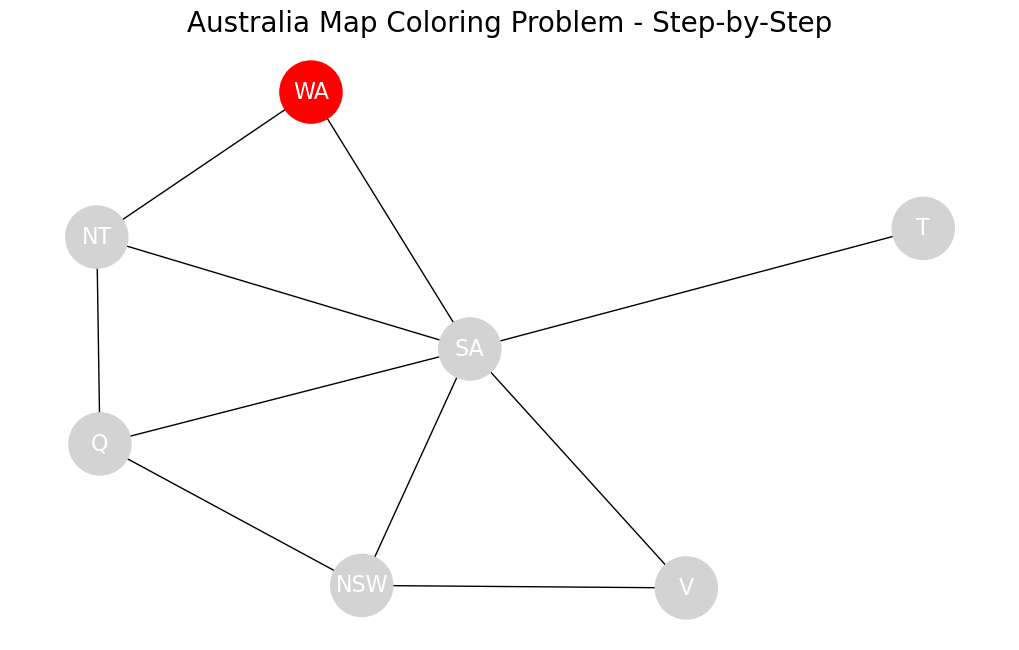

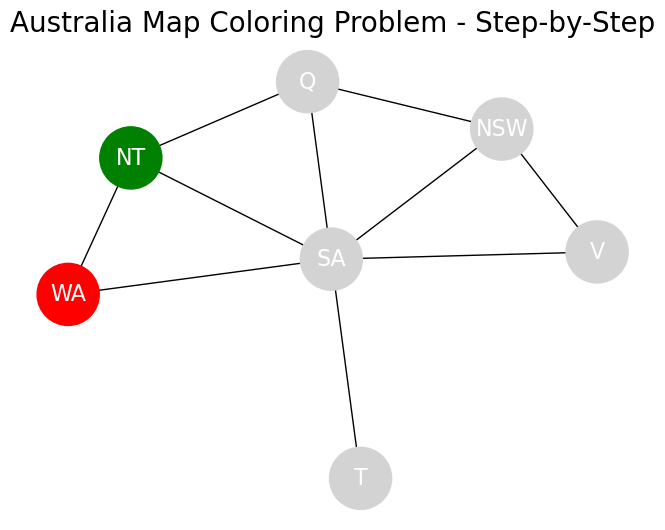

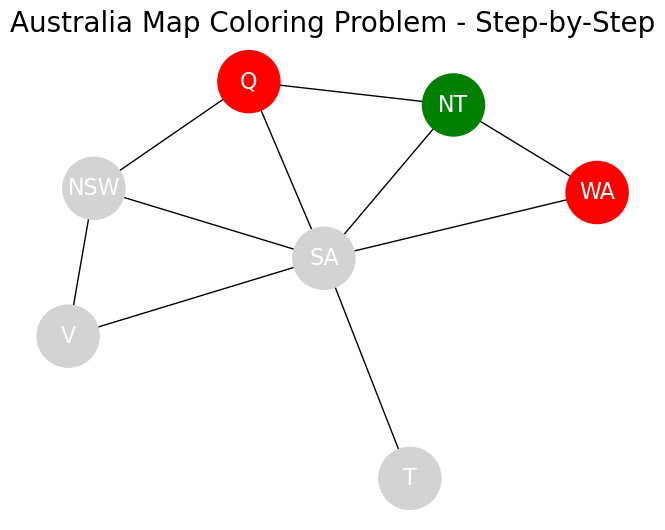

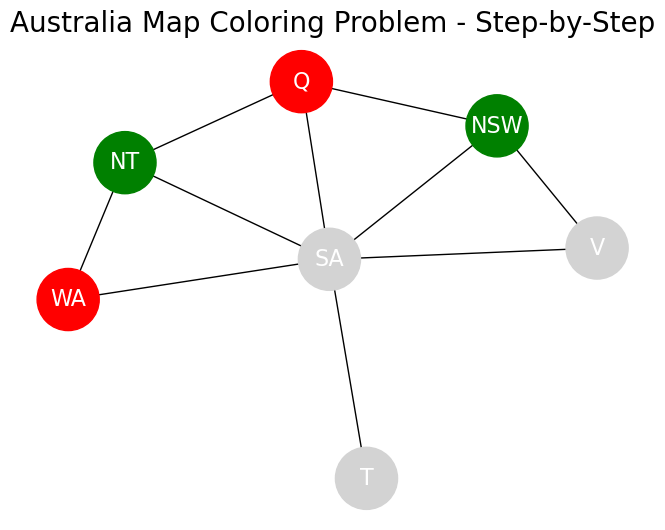

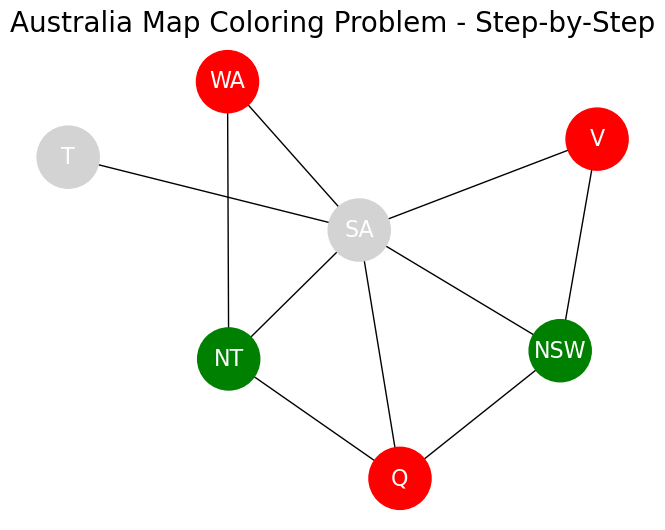

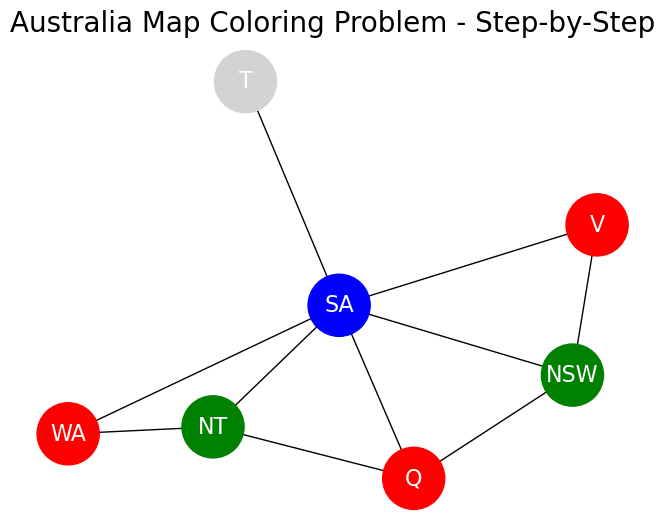

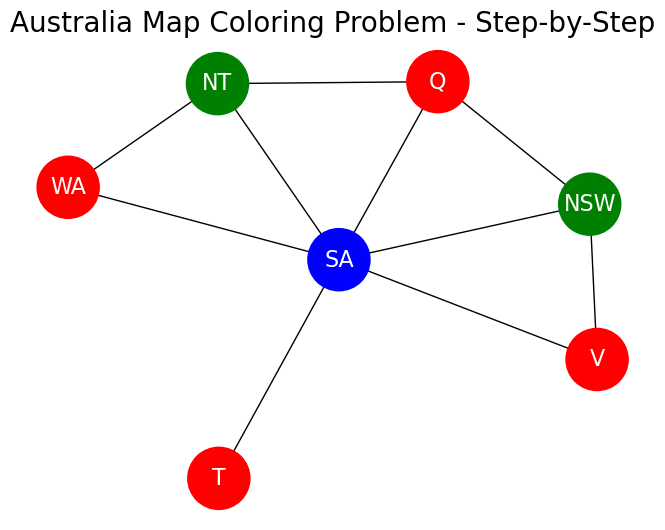

Color assignments for the regions:
WA: red
NT: green
Q: red
NSW: green
V: red
SA: blue
T: red


In [10]:
import matplotlib.pyplot as plt
import networkx as nx
import time

# Define the regions and their adjacency
regions = {
    'WA': ['NT', 'SA'],
    'NT': ['WA', 'Q', 'SA'],
    'Q': ['NT', 'NSW', 'SA'],
    'NSW': ['Q', 'SA', 'V'],
    'V': ['SA', 'NSW'],
    'SA': ['WA', 'NT', 'Q', 'NSW', 'V'],
    'T': ['SA']
}

colors = ['red', 'green', 'blue']  # Possible colors
assignment = {}  # To store the color assignments

def is_valid_assignment(region, color):
    """Check if the color assignment is valid."""
    for neighbor in regions[region]:
        if neighbor in assignment and assignment[neighbor] == color:
            return False
    return True

def select_unassigned_region():
    """Select the first unassigned region."""
    for region in regions:
        if region not in assignment:
            return region
    return None

def visualize_step():
    """Visualize the coloring step using a graph."""
    # Create a graph
    G = nx.Graph()

    # Add nodes and edges based on regions and adjacency
    for region in regions:
        G.add_node(region)
        for neighbor in regions[region]:
            G.add_edge(region, neighbor)

    # Set colors for nodes based on the current assignment
    color_map = []
    for region in G.nodes:
        color_map.append(assignment.get(region, 'lightgrey'))  # Default color for unassigned regions

    # Clear the previous plot and draw the new one
    plt.clf()  # Clear the figure
    nx.draw(G, with_labels=True, node_color=color_map, node_size=2000, font_size=16, font_color='white')
    plt.title("Australia Map Coloring Problem - Step-by-Step", fontsize=20)
    plt.pause(1)  # Pause for 1 second to visualize the current step

def backtrack():
    """Recursive backtracking algorithm to solve the map coloring problem with step-by-step visualization."""
    # If all regions are assigned, we have a solution
    if len(assignment) == len(regions):
        return assignment

    # Select an unassigned region
    unassigned_region = select_unassigned_region()

    for color in colors:
        if is_valid_assignment(unassigned_region, color):
            # Assign color to the region
            assignment[unassigned_region] = color
            
            # Visualize this step
            visualize_step()

            # Recursively try to assign colors to the rest
            result = backtrack()
            if result:
                return result  # Solution found
            
            # Backtrack: remove the color assignment
            del assignment[unassigned_region]
            
            # Visualize backtracking step
            visualize_step()

    return None  # No valid assignment found

def solve():
    """Solve the map coloring problem."""
    plt.ion()  # Turn on interactive mode for plotting
    solution = backtrack()
    plt.ioff()  # Turn off interactive mode when done
    return solution

# Initialize the plot
plt.figure(figsize=(10, 6))

# Solve the map coloring problem
solution = solve()

# Display the solution
if solution:
    print("Color assignments for the regions:")
    for region, color in solution.items():
        print(f"{region}: {color}")
else:
    print("No solution exists.")
    
# Keep the final plot open
plt.show()


### Soduku

In [1]:
puzzle = [[5, 3, 0, 0, 7, 0, 0, 0, 0],
          [6, 0, 0, 1, 9, 5, 0, 0, 0],
          [0, 9, 8, 0, 0, 0, 0, 6, 0],
          [8, 0, 0, 0, 6, 0, 0, 0, 3],
          [4, 0, 0, 8, 0, 3, 0, 0, 1],
          [7, 0, 0, 0, 2, 0, 0, 0, 6],
          [0, 6, 0, 0, 0, 0, 2, 8, 0],
          [0, 0, 0, 4, 1, 9, 0, 0, 5],
          [0, 0, 0, 0, 8, 0, 0, 0, 0]
          ]

def print_sudoku(puzzle):
    for i in range(9):
        if i % 3 == 0 and i != 0:
            print("- - - - - - - - - - - ")
        for j in range(9):
            if j % 3 == 0 and j != 0:
                print(" | ", end="")
            print(puzzle[i][j], end=" ")
        print()

print_sudoku(puzzle)



5 3 0  | 0 7 0  | 0 0 0 
6 0 0  | 1 9 5  | 0 0 0 
0 9 8  | 0 0 0  | 0 6 0 
- - - - - - - - - - - 
8 0 0  | 0 6 0  | 0 0 3 
4 0 0  | 8 0 3  | 0 0 1 
7 0 0  | 0 2 0  | 0 0 6 
- - - - - - - - - - - 
0 6 0  | 0 0 0  | 2 8 0 
0 0 0  | 4 1 9  | 0 0 5 
0 0 0  | 0 8 0  | 0 0 0 


## Create the CSP Solver Class

In [2]:
class CSP:
    def __init__(self, variables, Domains,constraints):
        self.variables = variables
        self.domains = Domains
        self.constraints = constraints
        self.solution = None

    def solve(self):
        assignment = {}
        self.solution = self.backtrack(assignment)
        return self.solution

    def backtrack(self, assignment):
        if len(assignment) == len(self.variables):
            return assignment

        var = self.select_unassigned_variable(assignment)
        for value in self.order_domain_values(var, assignment):
            if self.is_consistent(var, value, assignment):
                assignment[var] = value
                result = self.backtrack(assignment)
                if result is not None:
                    return result
                del assignment[var]
        return None
    # Implement Helper Functions for Backtracking
    def select_unassigned_variable(self, assignment):
        unassigned_vars = [var for var in self.variables if var not in assignment]
        return min(unassigned_vars, key=lambda var: len(self.domains[var]))

    def order_domain_values(self, var, assignment):
        return self.domains[var]

    def is_consistent(self, var, value, assignment):
        for constraint_var in self.constraints[var]:
            if constraint_var in assignment and assignment[constraint_var] == value:
                return False
        return True
    

## Define Variables, Domains, and Constraints

In [3]:
# Variables
variables = [(i, j) for i in range(9) for j in range(9)]
# Domains
Domains   = {var: set(range(1, 10)) if puzzle[var[0]][var[1]] == 0 
                        else {puzzle[var[0]][var[1]]} for var in variables}

# Add contraint
def add_constraint(var):
    constraints[var] = []
    for i in range(9):
        if i != var[0]:
            constraints[var].append((i, var[1]))
        if i != var[1]:
            constraints[var].append((var[0], i))
    sub_i, sub_j = var[0] // 3, var[1] // 3
    for i in range(sub_i * 3, (sub_i + 1) * 3):
        for j in range(sub_j * 3, (sub_j + 1) * 3):
            if (i, j) != var:
                constraints[var].append((i, j))
# constraints         
constraints = {}
for i in range(9):
    for j in range(9):
        add_constraint((i, j))
        

## Solve the Sudoku Puzzle Using CSP

In [4]:
# Solution
print('*'*7,'Solution','*'*7)
csp = CSP(variables, Domains, constraints)
sol = csp.solve()

solution = [[0 for i in range(9)] for i in range(9)]
for i,j in sol:
    solution[i][j]=sol[i,j]
    
print_sudoku(solution)


******* Solution *******
5 3 4  | 6 7 8  | 1 9 2 
6 7 2  | 1 9 5  | 3 4 8 
1 9 8  | 3 4 2  | 5 6 7 
- - - - - - - - - - - 
8 5 9  | 7 6 1  | 4 2 3 
4 2 6  | 8 5 3  | 9 7 1 
7 1 3  | 9 2 4  | 8 5 6 
- - - - - - - - - - - 
9 6 1  | 5 3 7  | 2 8 4 
2 8 7  | 4 1 9  | 6 3 5 
3 4 5  | 2 8 6  | 7 1 9 
